In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [4]:
df = pd.read_csv("../Final Project/Datasets/encounters-by-facility_2012-2023_20240702.csv")

In [8]:
# Convert 'year' to datetime and 'count' to numeric
df['year'] = pd.to_datetime(df['year'], format='%Y')
df['count'] = pd.to_numeric(df['count'], errors='coerce')

In [10]:
# Create a 'visit_type' column
df['visit_type'] = df['type'].map({'ED_Admit': 'Admission', 'ED_Visit': 'Visit'})

In [12]:
# Group by year and visit type, then sum the counts
df_yearly = df.groupby(['year', 'visit_type'])['count'].sum().unstack()
df_yearly['Total'] = df_yearly['Admission'] + df_yearly['Visit']
df_yearly['Admission_Rate'] = df_yearly['Admission'] / df_yearly['Total']

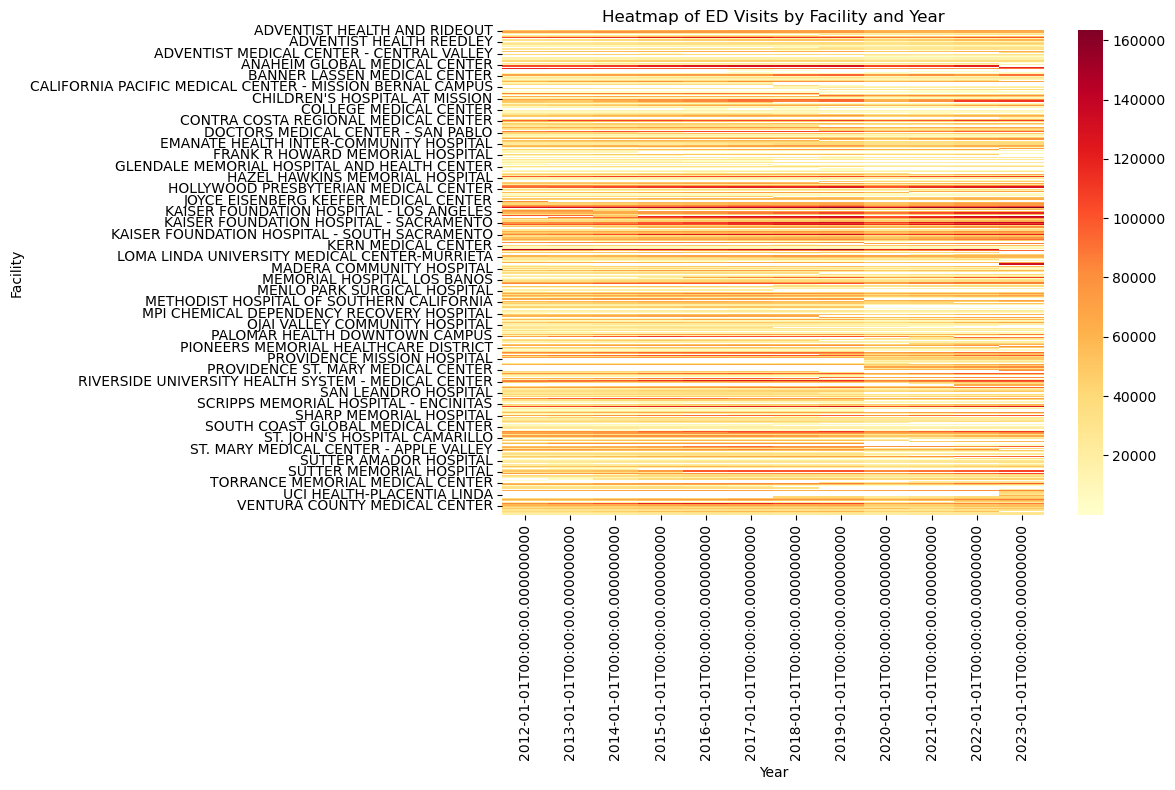

In [16]:
#Heatmap of ED visits by facility and year
plt.figure(figsize=(12, 8))
heatmap_data = df.pivot_table(values='count', index='facility_name', columns='year', aggfunc='sum')
sns.heatmap(heatmap_data, cmap='YlOrRd', annot=False, fmt='g')
plt.title('Heatmap of ED Visits by Facility and Year')
plt.ylabel('Facility')
plt.xlabel('Year')
plt.tight_layout()
plt.savefig('heatmap_ed_visits.png')
plt.show()

In [18]:
# Create a dashboard using Plotly
fig = make_subplots(rows=2, cols=2, subplot_titles=("Total ED Visits Over Time", 
                                                    "Admission Rate Over Time",
                                                    "ED Visits by Type",
                                                    "Top 10 Facilities by Total Visits (2023)"))

# Total ED Visits Over Time
fig.add_trace(go.Scatter(x=df_yearly.index, y=df_yearly['Total'], mode='lines+markers', name='Total Visits'),
              row=1, col=1)

# Admission Rate Over Time
fig.add_trace(go.Scatter(x=df_yearly.index, y=df_yearly['Admission_Rate'], mode='lines+markers', name='Admission Rate'),
              row=1, col=2)

# ED Visits by Type
fig.add_trace(go.Bar(x=df_yearly.index, y=df_yearly['Visit'], name='Visits'),
              row=2, col=1)
fig.add_trace(go.Bar(x=df_yearly.index, y=df_yearly['Admission'], name='Admissions'),
              row=2, col=1)

# Top 10 Facilities by Total Visits in 2023
top_facilities = df[df['year'].dt.year == 2023].groupby('facility_name')['count'].sum().nlargest(10)
fig.add_trace(go.Bar(x=top_facilities.index, y=top_facilities.values, name='Total Visits'),
              row=2, col=2)

fig.update_layout(height=800, width=1200, title_text="Emergency Department Dashboard")
fig.write_image("ed_dashboard.png")

print("Visualizations have been saved as 'heatmap_ed_visits.png' and 'ed_dashboard.png'.")

Visualizations have been saved as 'heatmap_ed_visits.png' and 'ed_dashboard.png'.
